In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df= pd.read_csv('/kaggle/input/data-science-job-posting-on-glassdoor/Uncleaned_DS_jobs.csv')

In [3]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
print(df.shape,df.size)

(672, 15) 10080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [8]:
df.drop(['index','Job Description'],axis = 1, inplace = True)

In [9]:
df.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1


In [11]:
df['Salary Estimate'].unique

<bound method Series.unique of 0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: object>

In [43]:
df['Rating'].mean()

3.8111480865224627

In [44]:
df.Rating= df['Rating'].replace(-1, 3.8)

/tmp/ipykernel_30/1961040383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rating= df['Rating'].replace(-1, 3.8)


In [45]:
df['Rating'].value_counts()

Rating
3.5    56
3.8    46
3.3    41
3.9    40
4.0    39
3.7    38
4.5    31
5.0    29
3.6    29
4.2    29
3.4    28
4.1    24
4.4    21
3.2    21
4.7    20
4.8    20
2.9    13
4.6    12
3.1    12
4.3    11
4.9    11
2.7    10
3.0     7
2.6     3
2.8     3
2.5     2
2.4     1
2.3     1
2.2     1
2.1     1
2.0     1
Name: count, dtype: int64

In [13]:
df['Company Name'].str.split('\\n', expand = True)[0]

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: 0, Length: 672, dtype: object

In [15]:
df['Company Name']=df['Company Name'].str.split('\\n', expand = True)[0]

In [19]:
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [21]:
df[df['Size']== 'Unknown']

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
189,Principal Data Scientist - Machine Learning,$56K-$97K (Glassdoor est.),3.6,Constant Contact,"Waltham, MA","Waltham, MA",Unknown,1995,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Drip, iContact, Mailchimp"
193,Data Scientist,$56K-$97K (Glassdoor est.),5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1
258,Data Scientist,$90K-$124K (Glassdoor est.),5.0,"The Drive Media, Inc.","New York, NY",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
261,Principal Data Scientist - Machine Learning,$90K-$124K (Glassdoor est.),3.6,Constant Contact,"Waltham, MA","Waltham, MA",Unknown,1995,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Drip, iContact, Mailchimp"
274,Data Scientist,$91K-$150K (Glassdoor est.),5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1
282,Data Scientist,$91K-$150K (Glassdoor est.),-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
285,Data Scientist,$141K-$225K (Glassdoor est.),-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
308,Data Scientist,$145K-$225K(Employer est.),5.0,Kollasoft Inc.,"New York, NY","Irving, TX",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1
409,Data Scientist,$124K-$198K (Glassdoor est.),-1.0,Navio,"San Mateo, CA","Half Moon Bay, CA",Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
424,Data Scientist,$124K-$198K (Glassdoor est.),3.4,Voice,"Brooklyn, NY",-1,Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [22]:
df['Size'].value_counts()

Size
51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: count, dtype: int64

In [25]:
df['Size']=df['Size'].str.replace('Unknown','51 to 200 employees')
df['Size']=df['Size'].str.replace('-1','51 to 200 employees')

In [27]:
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees'], dtype=object)

In [29]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [30]:
df.drop(['Founded'], axis = 1,inplace= True)

In [31]:
df.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1


In [32]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [33]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

In [34]:
df['Type of ownership']=df['Type of ownership'].str.replace('-1','Company - Private')

In [35]:
df['Industry'].value_counts()

Industry
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [38]:
df= df[df['Industry']!= '-1']

In [41]:
df.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)


AttributeError: module 'matplotlib' has no attribute 'xticks'

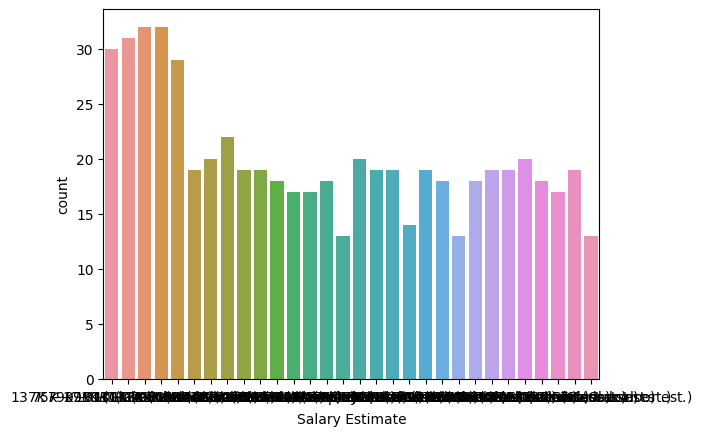

In [42]:
sns.countplot(data =df,x ='Salary Estimate')
plt.xticks('rotation = 90')
plt.title('Most Common Salary')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'matplotlib' has no attribute 'title'

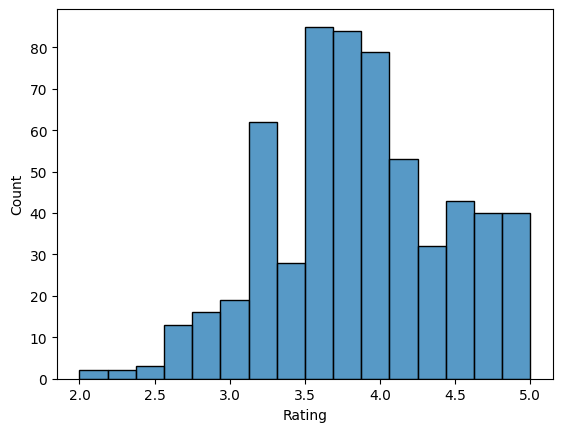

In [47]:
sns.histplot(data = df, x = 'Rating')
plt.title('Ratings Distribution')
plt.show()